# How is resolution computed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ctaplot.ana import resolution

## Normal distribution
For a nomal distribution, $\sigma$ corresponds to the 68 percentile of the distribution   
See the [68–95–99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

68th percentile = 2.9975
95th percentile = 6.0096
99th percentile = 9.0059


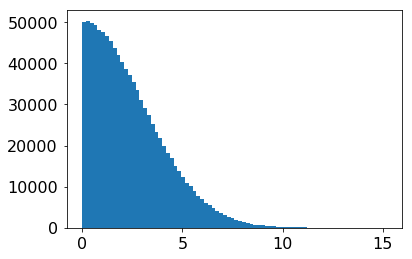

In [33]:
loc = 10
scale = 3

X = np.random.normal(size=1000000, scale=scale, loc=loc)
plt.hist(np.abs(X - loc), bins=80)

sig_68 = np.percentile(np.abs(X - loc), 68.27)
sig_95 = np.percentile(np.abs(X - loc), 95.45)
sig_99 = np.percentile(np.abs(X - loc), 99.73)

print("68th percentile = {:.4f}".format(sig_68))
print("95th percentile = {:.4f}".format(sig_95))
print("99th percentile = {:.4f}".format(sig_99))

assert np.isclose(sig_68, scale, rtol=1e-2)
assert np.isclose(sig_95, 2 * scale, rtol=1e-2)
assert np.isclose(sig_99, 3 * scale, rtol=1e-2)

## Resolution
The resolution is defined as the 68th percentile of the relative error `err = (reco - simu)/reco`    
Hence, if the relative error follows a normal distribution, the resolution is equal to the sigma of the distribution

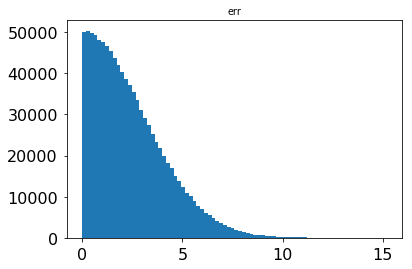

In [34]:
err = np.abs(X - loc)
simu = loc * np.ones(X.shape[0])
plt.hist(err, bins=80)
plt.title('err')
plt.show()

Let's define `reco` in order to have a relative error equals to `err`.   
Its resolution is equals to the sigma of the distribution

In [35]:
reco = simu / (1 - (X - loc))
res = resolution(simu, reco)
print(res)
assert np.isclose(res[0], scale, rtol=1e-2)

[2.98071154 2.97606628 2.98567002]
